# Cardio Good Fitness Project - Student = Yoel Lapin


Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. 


-Come up with a customer profile (characteristics of a customer) of the different products.

-Perform uni-variate and multi-variate analyses.

-Generate a set of insights and recommendations that will help the company in targeting new customers.


### Import Python libraries and acquire the data set 

Set the environment for the Exploratory Data Analysis

In [1]:
# import the libraries for usage 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import pandas_profiling 



In [2]:
# Data acquisition 
good_cf = pd.read_csv ('CardioGoodFitness.csv')

### Basic Exploratory Data Analysis

Perform the first tasks to explore and understand the dataset characteristics 

In [3]:
# Find the dataset number of records and attributes
good_cf.shape

(180, 9)

In [4]:
# Checking the different data type across the dataset
good_cf.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# Summarizing the attributes basic statistical data  
good_cf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
# Become familiar with the dataset values and meaning by reviewing the first few records
good_cf.head ()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Univariable analysis

Explore the data and distribution across single variables to understand the products, sales, and customers demographics 

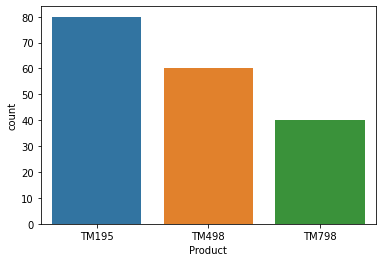

In [7]:
# Look into the number of sales per product  
sns.countplot (data = good_cf, x='Product'  );
plt.show ()

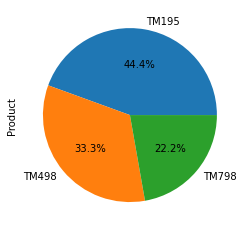

In [8]:
# Look into a better visualization of sales distribution per product 
nbr_of_sales = good_cf.groupby("Product")["Product"].count()
nbr_of_sales
nbr_of_sales.plot.pie(autopct="%.1f%%");

    Based on the number of transactions TM195 is the top rating but still, it’s not clear the price either the profit per unit. 

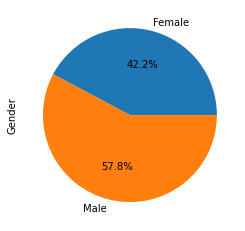

In [9]:
# Explore gender demographics distribution
gender_count = good_cf.groupby("Gender")["Gender"].count()
gender_count
gender_count.plot.pie(autopct="%.1f%%");

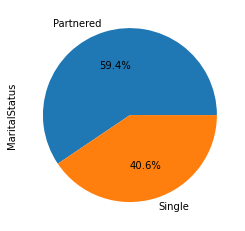

In [10]:
# Explore marital status demographics 
ms_count = good_cf.groupby("MaritalStatus")["MaritalStatus"].count()
ms_count
ms_count.plot.pie(autopct="%.1f%%");

    So far, we can observe the percentage of partnered and males customers is slightly higher, approximately ~10%. 

### Bivariate and Multivariate Analysis

We are going to go further into understanding the products, sales, and customers' demographics. As well as discovered patterns and correlations related to usage, miles, fitness, education, and income. We will look into Categorical Variables,  Qualitative vs. Categorical Variables and Quantitative vs Qualitative Variables


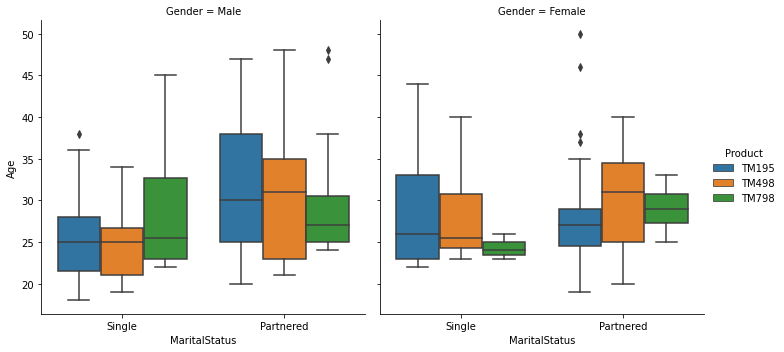

In [11]:
# Checking deeper the demographics of the customer base
# look for a clue about segmentation and relationship to the product they bought  
sns.catplot(x="MaritalStatus",
               y = "Age",
               hue="Product", 
               col="Gender", 
               data=good_cf, 
               kind="box");

    We can observe most of the customers are 20 to 35 years old across the genders. Partnered males are slightly older.
    It's very difficult to realize from the above categorical values and age a very clear connection to the customer product preference. We will need to further search for quantitive variables and their correlations.


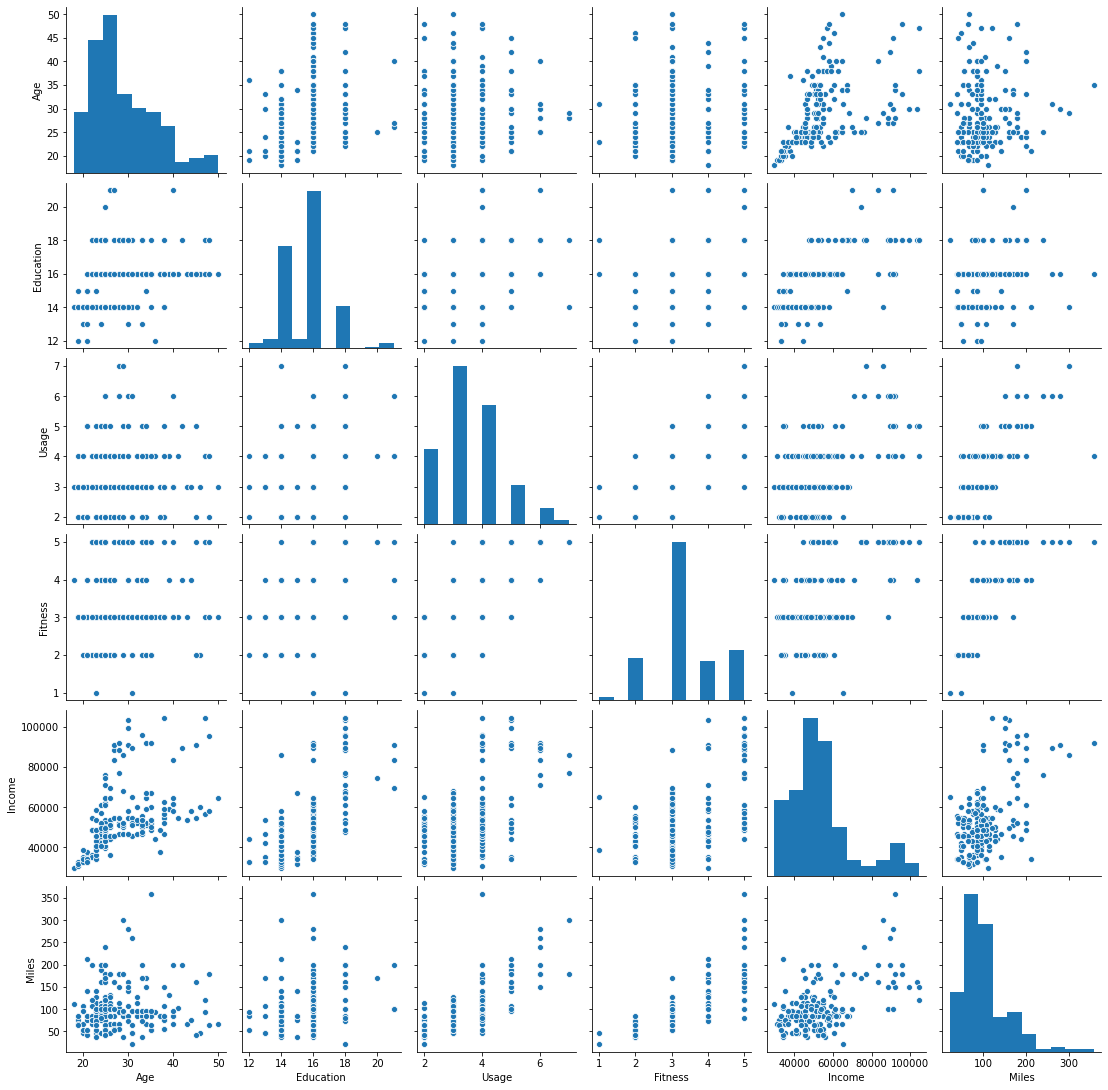

In [12]:
# Using pair plot to check across the data possible correlations and relations to raise conclusion or check further
sns.pairplot(good_cf)

In [13]:
# Looking into pandas profiling analysis, 
# even it’s overlapping some of the previous analysis may be new data points and visualization can assist in the research
pandas_profiling.ProfileReport(good_cf)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# What is the numerical correlation across quantitative variables?  Let check the correlations 
correlation = good_cf.corr()  
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


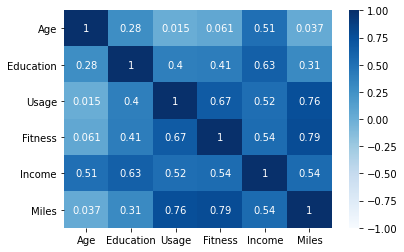

In [15]:
# Looking for a better correlation visualization by using a heatmap  
sns.heatmap(correlation, annot=True,  cmap ='Blues' , vmin=-1, vmax=1)

    The observations from the above charts and statistical data.
    •	Income and education are correlated positively to some extend, ~0.63; and age to a lower extend by ~0.51.
    •	Another important vector of correlated variables are miles, fitness, and usage; and of course, it makes sense if we think further into causation but let don't go there yet.
    •	How education/ income correlates with the other vector (usage, fitness, miles)? Income correlated higher positively vs. education to this vector.
    •	It looks more educated and older customers earn more, and as well higher-income customers are using more treadmills with has a clear connection to fitness and miles. 
  
    Other univariable observations:
    •	Income has positive skewness, only 25% earning more than ~58K USD. 
    •	Most of the customers use the treadmill 3 to 4 times a week. 
    •	Most of the customers have a college education >= 16 years of educations.
    •	The age distribution is having a positive skewness with most of the customers under 30. 
    •	More than half of the customers consider themselves as Fitness = 3. 
    •	Only a few customers are planning to run more than 200 miles, the average will run ~103 miles. 
    •	Other categorical variables were analyzed previously. 
    
    •	Let go ahead and check if we can discover connections between categorical and quantitative variables providing light for the recommendations.


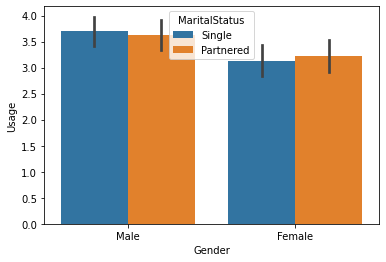

In [16]:
# Is marital status or gender impacting usage, fitness, and miles? 
# We know usage, fitness, and miles are correlated so we can choose one variable
sns.barplot (data=good_cf, x='Gender', y ='Usage', hue=good_cf['MaritalStatus']);
plt.show()



    Males are using slightly more the treadmill, why? Is the income higher? We know usage and income are correlated. 

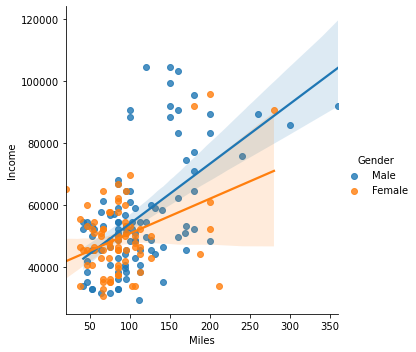

In [17]:
# We are looking for a different angle of usage by using miles correlated to income by gender
sns.lmplot (data= good_cf , x = 'Miles', y ='Income' , hue='Gender' , fit_reg =True);
plt.show()

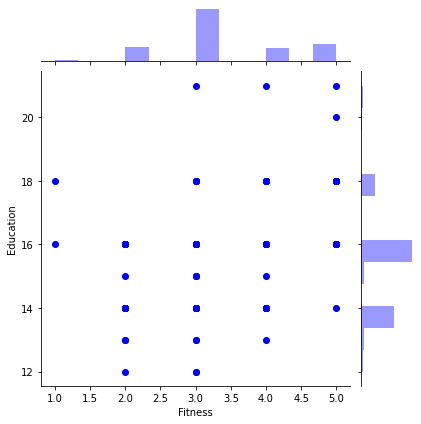

In [18]:
# Another view looking into correlated variables fitness and education
sns.jointplot (data = good_cf, x = 'Fitness' , y = 'Education',color='blue');
plt.show ()

    It’s clear from the above that females are earning less vs. males. And as well education and fitness are positively correlated.

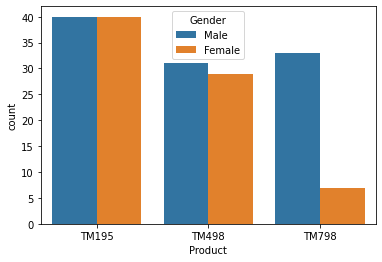

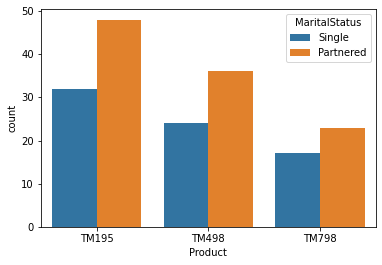

In [19]:
# Checking the products by Gender
sns.countplot (data = good_cf, x='Product' , hue = 'Gender');
plt.show ()

# Checking the products by Marital Status
sns.countplot (data = good_cf, x='Product' , hue = 'MaritalStatus');
plt.show ()



    It looks males prefer the product TM195 and females don't buy product TM798. Marital status is not playing a role. 

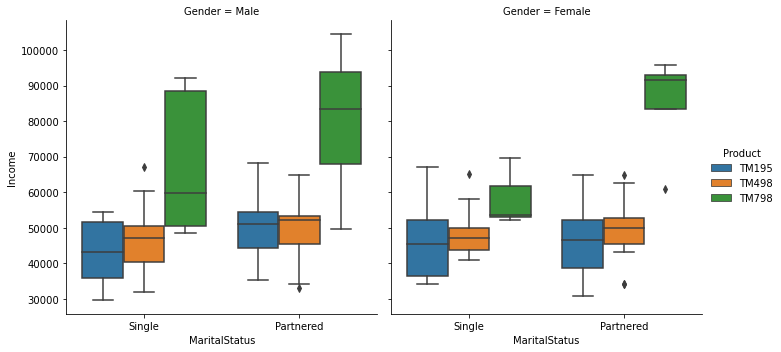

In [20]:
#  How can we link demographics, income, and products to get further insights? Let use the below cat plot
sns.catplot(x="MaritalStatus",
               y = "Income",
               hue="Product", 
               col="Gender", 
               data=good_cf, 
               kind="box");

    Higher-income customers buy TM798 across genders and marital status. We can assume this is probably a more sophisticated and expensive product.  As well we know from previous charts higher-income customers tend to use the treadmill more and run more miles. 
    Higher IQR for males shows a more disperse income distribution in the high-end.


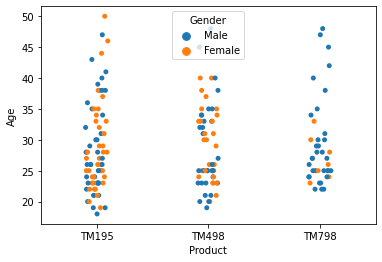

In [21]:
# How age and gender play into the picture? We can use a strip plot
sns.stripplot(data = good_cf, x='Product', y ='Age' , hue='Gender', jitter=True);
plt.show()

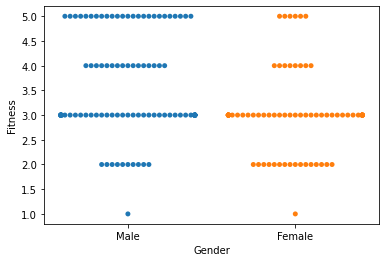

In [22]:
# Last, how fitness, miles, and usage plays by gender, let choose fitness as we know the others (e.g. miles , usage) 
# are correlated. If needed we can explore more.
sns.swarmplot(data = good_cf, x='Gender', y ='Fitness');
plt.show()


    We can see older people using more TM195 and TM798, while we have a higher rate of males. As well males having higher fitness rates which we know correlate to usage and miles.